In [1]:
import tensorflow as tf
import numpy as np

In [2]:
print(tf.__version__)

1.15.0


In [3]:
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.mnist.load_data()

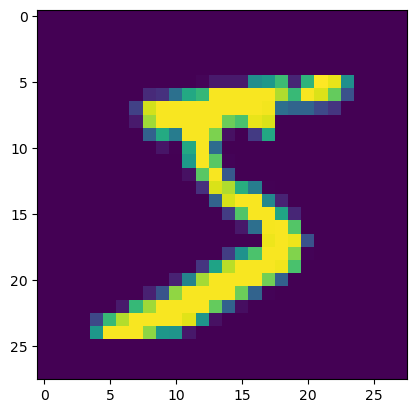

In [5]:
for i in range(1):
     plt.imshow(X_train[i])

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1) 

In [8]:
convolutional_neural_network = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
convolutional_neural_network.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
convolutional_neural_network.fit(X_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 307us/sample - loss: 0.2259 - acc: 0.9297
Epoch 2/5
60000/60000 [==============================] - 20s 333us/sample - loss: 0.0751 - acc: 0.9770
Epoch 3/5
60000/60000 [==============================] - 20s 332us/sample - loss: 0.0532 - acc: 0.9833
Epoch 4/5
38112/60000 [==================>...........] - ETA: 7s - loss: 0.0417 - acc: 0.9871

In [ ]:
convolutional_neural_network.evaluate(X_test, y_test)

In [ ]:
y_predicted = convolutional_neural_network.predict(X_test)

In [ ]:
y_predicted[0]

In [ ]:
np.argmax(y_predicted[0])

In [ ]:
plt.imshow(X_test[0])

In [ ]:
convolutional_neural_network.save('Digit15.h5')

# Model Conversion

In [ ]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.
 
    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

In [ ]:
from tensorflow.keras import backend as K


frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])